In [5]:
import numpy as np  
import matplotlib.pyplot as plt

Costants and given values

In [6]:
ndark=0.002      #number of electrons/sec/pixel
NRON=1.5         #Read out noise

Cr=-16.26
skyBr_r=5.47*10**(-16)

Ci=-16.06
skyBr_i=2.15*10**(-16)

Cg=-16.26
skyBr_g=8.11*10**(-16)

In [7]:
r=1.5                   #PSF radius 
A=np.pi*r**2
Npix=A/0.55**2          #Number of pixel from the PSF and dimension in arcsec of the pixel length 
Npix

23.367218084552178

In [19]:
c=3*10**(18)
li=8000
lr=6500
lg=4500

Final Formula

In [21]:
def SNR(time, C, ml, skyBr,l):
    nsky=skyBr/10**C*0.55**2
    nstar=10**(-((ml+48.6)/2.5+C))*c/l**2
    return nstar*time/np.sqrt(nstar*time+Npix*(nsky*time+ndark*time+NRON**2))

#SNR_vectorized = np.vectorize(SNR)

In [ ]:
mnu=19

Text(0, 0.5, 'SNR')

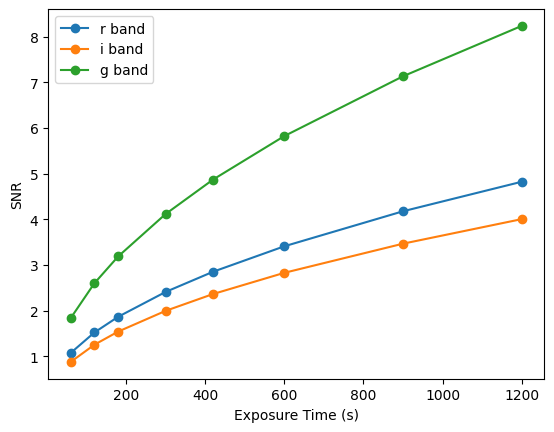

In [23]:
t_values = np.array([60, 120, 180, 300, 420, 600, 900, 1200]) #in seconds 
snr_values_r = SNR(t_values, Cr,mnu, skyBr_r,lr)
snr_values_i = SNR(t_values, Ci,mnu, skyBr_i,li)
snr_values_g = SNR(t_values, Cg,mnu, skyBr_g,lg)
plt.plot(t_values, snr_values_r, label='r band', marker='o')
plt.plot(t_values, snr_values_i, label='i band', marker='o')
plt.plot(t_values, snr_values_g, label='g band', marker='o')
plt.xlabel('Exposure Time (s)')
plt.legend()
plt.ylabel('SNR')